In [1]:
import pandas as pd
import numpy as np
# For compatibility across multiple platforms


In [2]:
base = pd.read_csv('train.csv')
base.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
base.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
features = list(base.columns.drop('Purchase'))
#Verificamos la cantidad de datos y los nulos
print ('Cantidad de datos: ',len(base))
print ('% Nulos:')
print (base.isnull().sum()*100/len(base))

Cantidad de datos:  550068
% Nulos:
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64


#### Imputacion de nulos

In [6]:
# Las categorias Product_Category tienen nulos, sin embargo observamos que las categorias 2 y 3 son constantes por producto (fijate fijate!).
base[base.Product_ID == base.Product_ID.unique()[0]]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
825,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715
3314,1000541,P00069042,F,18-25,4,C,3,0,3,NaN,NaN,11037
4224,1000698,P00069042,M,18-25,4,A,1,0,3,NaN,NaN,8009
5864,1000951,P00069042,M,46-50,2,B,4+,1,3,NaN,NaN,13346
7984,1001242,P00069042,F,36-45,0,A,0,1,3,NaN,NaN,13508
8978,1001375,P00069042,F,46-50,5,B,2,1,3,NaN,NaN,10826
13036,1001950,P00069042,M,26-35,12,C,1,0,3,NaN,NaN,13655
25222,1003884,P00069042,M,18-25,4,A,1,1,3,NaN,NaN,10879
25674,1003951,P00069042,F,18-25,4,C,3,1,3,NaN,NaN,13452


In [7]:
# Podriamos considerar el NAN como otra categoria
print (base.Product_Category_1.unique())
print (base.Product_Category_2.unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ nan   6.  14.   2.   8.  15.  16.  11.   5.   3.   4.  12.   9.  10.  17.
  13.   7.  18.]


In [8]:
# Imputamos el nulo con 0
base.Product_Category_2.fillna(0,inplace = True)
base.Product_Category_3.fillna(0,inplace = True)

### Clasificacion de variables

In [9]:
#features.remove('Product_Category_2','Product_Category_2')
num_features = list(base[features].describe().columns)
cat_features = list(base[features].drop(num_features, axis=1).columns)
print ('Variables Numericas')
print (num_features)
print ('\nVariables Categoricas')
print (cat_features)

Variables Numericas
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

Variables Categoricas
['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


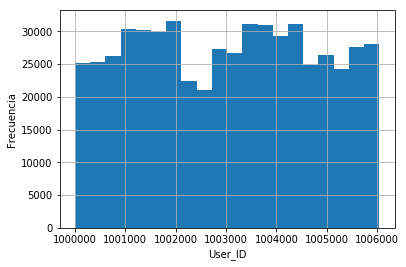

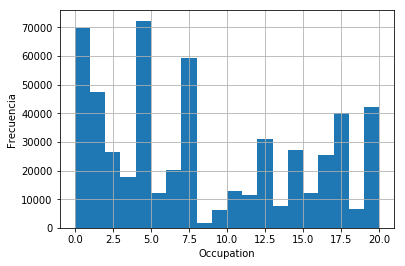

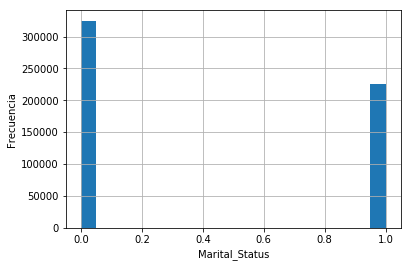

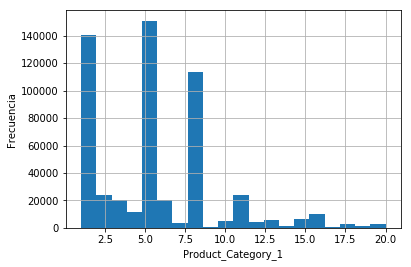

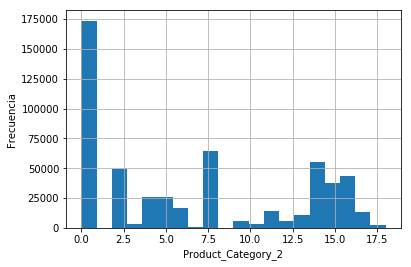

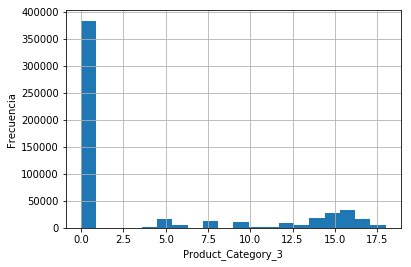

In [10]:
import matplotlib.pyplot as plt
for feature in num_features:
    base[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

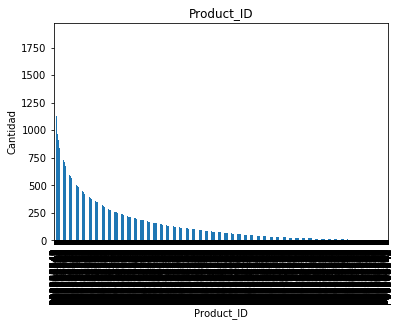

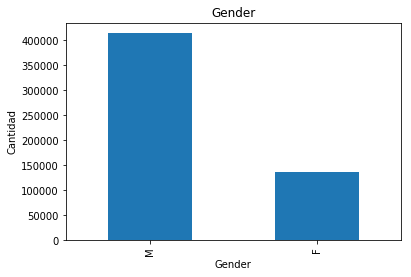

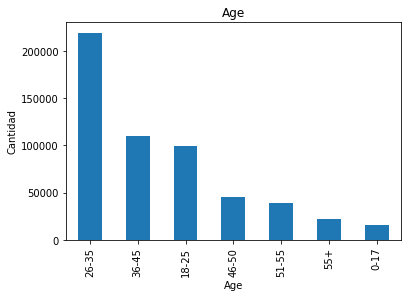

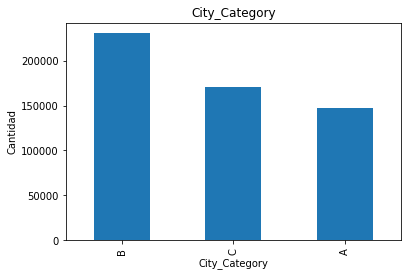

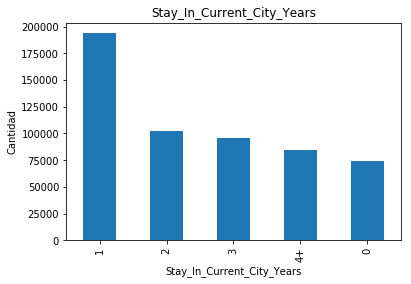

In [11]:
for feature in cat_features:
    var = base.groupby(feature)[feature].count().sort_values(ascending = False)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Cantidad')
    ax1.set_title(feature)
    var.plot(kind='bar')
    plt.show()

In [12]:
# verificamos los percentiles
vector_percentiles = [0,10,50,90,95,99,100]
for feature in num_features:
    per = np.nanpercentile(base[feature],vector_percentiles)
    print(feature,per)

User_ID [ 1000001.  1000670.  1003077.  1005446.  1005747.  1005980.  1006040.]
Occupation [  0.   0.   7.  17.  20.  20.  20.]
Marital_Status [ 0.  0.  0.  1.  1.  1.  1.]
Product_Category_1 [  1.   1.   5.  11.  13.  18.  20.]
Product_Category_2 [  0.   0.   5.  16.  16.  17.  18.]
Product_Category_3 [  0.   0.   0.  15.  16.  17.  18.]


In [13]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [14]:
# Copiamos la tabla base a data
data = base.copy()

### Conversion de categoricos

In [15]:
print (data['City_Category'].unique())
print (data['Stay_In_Current_City_Years'].unique())

['A' 'C' 'B']
['2' '4+' '3' '1' '0']


In [16]:
# Convertimos Stay_In_Current_City_Years
dict_temp = {'0':0,'1':1,'2':2,'3':3,'4+':4}
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map(dict_temp)

In [17]:
dum = pd.get_dummies(data.City_Category,prefix='ccat',drop_first = True)
data = pd.concat([data,dum],axis=1)
data.drop('City_Category',axis= 1, inplace = True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ccat_B,ccat_C
0,1000001,P00069042,F,0-17,10,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,F,0-17,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,F,0-17,10,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,F,0-17,10,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,M,55+,16,4,0,8,0.0,0.0,7969,0,1


In [18]:
print (data['Age'].unique())
print (data['Gender'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['F' 'M']


In [19]:
dict_temp = {'0-17':1, '55+':7 ,'26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2}
data['Age'] = data['Age'].map(dict_temp)
dict_temp = {'M':1, 'F':0}
data['Gender'] = data['Gender'].map(dict_temp)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ccat_B,ccat_C
0,1000001,P00069042,0,1,10,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,1,7,16,4,0,8,0.0,0.0,7969,0,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
ccat_B                        550068 non-null uint8
ccat_C                        550068 non-null uint8
dtypes: float64(2), int64(8), object(1), uint8(2)
memory usage: 47.2+ MB


### Modelado

In [21]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3, random_state=99)

In [22]:
features = list(data.columns)
features

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase',
 'ccat_B',
 'ccat_C']

In [23]:
vars_to_model = ['Gender',
 'Age',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'ccat_B',
 'ccat_C']
target = 'Purchase'

In [24]:
X_train = data_train[vars_to_model]
y_train = data_train[target]
X_test = data_test[vars_to_model]
y_test = data_test[target]

In [25]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,ccat_B,ccat_C
98417,1,3,7,1,0,5,8.0,14.0,1,0
224961,0,3,6,2,0,6,16.0,0.0,1,0
376982,1,4,12,1,1,8,0.0,0.0,0,0
308531,0,3,20,1,1,15,17.0,0.0,1,0
53268,1,3,11,3,0,8,17.0,0.0,1,0


### Arbol de Decision

In [26]:
from sklearn import tree
tree.DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
model = tree.DecisionTreeClassifier(random_state = 99, max_depth=4)#, min_samples_leaf = 30)
model.fit(X_train,y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)

MemoryError: 

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred_test))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [37]:
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
dict_classifiers = {
    #"Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators = 18),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}
no_classifiers = len(dict_classifiers.keys())
 
def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score', 'test_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [38]:
#Evaluacion
df_results = batch_classify(X_train, y_train, X_test, y_test)
display(df_results.sort_values(by='test_score', ascending=False))

KeyboardInterrupt: 

In [41]:
# Create linear regression object
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 470.89481314  103.62496109    5.29956992    8.36593712  -62.29797176
 -349.86961042   12.32306141  143.75178208  144.23447673  623.303662  ]
Mean squared error: 21361836.94
Variance score: 0.15


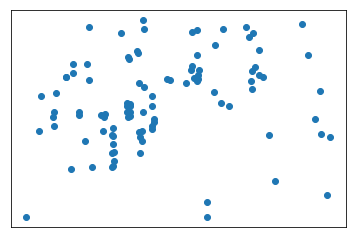

In [46]:
# Plot outputs
plt.plot(y_test[:100],y_pred[:100])#,  color='black')
#plt.plot(y_tst, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()